# Projet ML
GAUD - CURRAL - GALMIER

## Libraries

### Installation

In [47]:
! pip install tensorflow

### Import

In [73]:
import numpy as np
import tensorflow as tf
from glob import glob
from tensorflow import audio

import numpy as np
# import required modules 
import os
import matplotlib.pyplot as plt

### Variables

In [74]:
TEST_DATA_PATH = r'Data/test'
TRAIN_DATA_PATH = r'Data/train'

# Code

In [75]:
from os import listdir

foldersInTrain = list(listdir(TRAIN_DATA_PATH))
print(foldersInTrain)

['Asian Koel', 'Black Kite', 'Black-breasted Parrotbill', 'Black-necked crane', 'Bristled Grassbird', 'Cheer Pheasant', 'Common Cuckoo', 'Common Pochard', 'Common Wood Pigeon', 'Eastern Imperial Eagle', 'Egyptian Vulture', 'Great Slaty Woodpecker', 'Greater Spotted Eagle', 'Grey Treepie', 'Grey-crowned Prinia', 'Grey-sided Thrush', 'Himalayan Monal', 'House Crow', 'House Sparrow', 'Indian Spotted Eagle', 'Jerdon_s Babbler', 'Kashmir Flycatcher', 'Large-billed Crow', 'Long-tailed Duck', 'Pallas_s Fish Eagle', 'Red-billed Blue Magpie', 'Rose-ringed Parakeet', 'Rufous Treepie', 'Rufous-necked Hornbill', 'Rustic Bunting', 'Saker Falcon', 'Sarus Crane', 'Satyr Tragopan', 'Slender-billed Babbler', 'Spiny Babbler', 'Spotted Dove', 'Steppe Eagle', 'Swamp Francolin', 'Swamp Grass-babbler', 'White-throated Bushchat', 'Wood Snipe']


In [76]:
fileLabeled = {}

for folderName in foldersInTrain:
    PATH_TO_FOLDER = os.path.join(TEST_DATA_PATH, folderName)

    filesInFolder = listdir(PATH_TO_FOLDER)
    
    for fileNameWav in filesInFolder:
        splitName = fileNameWav.split('.')
        fileLabeled[splitName[0]] = folderName
        
print(fileLabeled)

{'XC161198 1': 'Asian Koel', 'XC162828 0': 'Asian Koel', 'XC179229 8': 'Asian Koel', 'XC182810 0': 'Asian Koel', 'XC196583 0': 'Asian Koel', 'XC196584 1': 'Asian Koel', 'XC236515 1': 'Asian Koel', 'XC311271 0': 'Asian Koel', 'XC314339 1': 'Asian Koel', 'XC327430 1': 'Asian Koel', 'XC327430 2': 'Asian Koel', 'XC332698 1': 'Asian Koel', 'XC359129 0': 'Asian Koel', 'XC365421 0': 'Asian Koel', 'XC369205 0': 'Asian Koel', 'XC369205 2': 'Asian Koel', 'XC412822 1': 'Asian Koel', 'XC416848 original': 'Asian Koel', 'XC426536 7': 'Asian Koel', 'XC446387 10': 'Asian Koel', 'XC454504 0': 'Asian Koel', 'XC461162 0': 'Asian Koel', 'XC461634 original': 'Asian Koel', 'XC531612 1': 'Asian Koel', 'XC576721 8': 'Asian Koel', 'XC578005 original': 'Asian Koel', 'XC591315 3': 'Asian Koel', 'XC591315 5': 'Asian Koel', 'XC594949 1': 'Asian Koel', 'XC594949 23': 'Asian Koel', 'XC594949 4': 'Asian Koel', 'XC594949 42': 'Asian Koel', 'XC594949 43': 'Asian Koel', 'XC594951 0': 'Asian Koel', 'XC635320 0': 'Asian K

In [77]:
trainFileNames = tf.random.shuffle(glob(TRAIN_DATA_PATH+'\\*\\*'))

In [96]:
trainFileNames

<tf.Tensor: shape=(5216,), dtype=string, numpy=
array([b'Data/train\\Kashmir Flycatcher\\XC522436 1.wav',
       b'Data/train\\Black-breasted Parrotbill\\XC19203 -2.wav',
       b'Data/train\\Common Wood Pigeon\\XC587645 7.wav', ...,
       b'Data/train\\House Crow\\XC552422 1.wav',
       b'Data/train\\Greater Spotted Eagle\\XC345704 original.wav',
       b'Data/train\\Rose-ringed Parakeet\\XC464252 1.wav'], dtype=object)>

In [78]:
allTrainFiles = tf.io.read_file(trainFileNames[0])

In [99]:
print(allTrainFiles)

tf.Tensor(b'RIFF$\xa6\x0e\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80\xbb\x00\x00\x00w\x01\x00\x02\x00\x10\x00data\x00\xa6\x0e\x00.\x00=\x00\x1c\x00\xef\xff\xe9\xff\x01\x00\x08\x00\xf0\xff\xdd\xff\xe6\xff\xfb\xff\t\x00\r\x00\x14\x00\x1d\x00\x1c\x00\n\x00\xf4\xff\xef\xff\xfc\xff\x05\x00\xf8\xff\xe3\xff\xdc\xff\xe8\xff\xfa\xff\x03\x00\x00\x00\xfc\xff\x04\x00\x17\x00\x1f\x00\x15\x00\x0b\x00\x0f\x00\t\x00\xed\xff\xd7\xff\xeb\xff\x12\x00\x1b\x00\xfa\xff\xd6\xff\xd0\xff\xe9\xff\x0f\x00\'\x00#\x00\x0c\x00\xf8\xff\xf2\xff\xec\xff\xea\xff\xfb\xff\x17\x00\x1e\x00\x0b\x00\xf8\xff\xf7\xff\xfb\xff\xfd\xff\x02\x00\x08\x00\x00\x00\xee\xff\xe6\xff\xf2\xff\x04\x00\r\x00\x0c\x00\x06\x00\x04\x00\x0b\x00\r\x00\xfb\xff\xe5\xff\xee\xff\x0f\x00\x1c\x00\x01\x00\xdf\xff\xdb\xff\xf4\xff\x11\x00$\x00 \x00\x08\x00\xf5\xff\xff\xff\x15\x00\x12\x00\xf6\xff\xe5\xff\xed\xff\xf8\xff\xfa\xff\xf8\xff\xf4\xff\xe9\xff\xec\xff\x0f\x00=\x00E\x00\x1d\x00\xec\xff\xda\xff\xe9\xff\x00\x00\x06\x00\xf8\xff\xe7\xff\xe4\xff\xf5\

In [79]:
test_audio, samplerate = tf.audio.decode_wav(contents=allTrainFiles)

In [80]:
def decode_audio(audio_binary):
    audio, _ = tf.audio.decode_wav(contents=audio_binary)
    return tf.squeeze(audio, axis=-1)

In [81]:
import os


def get_label_from_filepath(file_path):

    parts = tf.strings.split(input=file_path, sep=os.path.sep)
    print(parts[-2])
    return parts[-2]

In [82]:
t = get_label_from_filepath(allTrainFiles)
print(type(t))
print(t.numpy())

tf.Tensor(b'\x00c\x00\xed\xff\x9a\xff\xf7\xff\x89\x00a\x00\x8e\xff\'\xff\xaf\xffs\x00\xb5\x00\x84\x00"\x00\x91\xff\x1b\xffZ\xffQ\x00\x13\x01\xc4\x00\xa5\xff\xde\xfe>\xffN\x00\xee\x00\xbb\x00D\x00\xe1\xffY\xff\xe6\xfeZ\xff\xa4\x00[\x01\x95\x00I\xff\xff\xfe\xd8\xff\xb2\x00\xc2\x007\x00\x97\xff>\xff[\xff\xed\xff\x99\x00\xd9\x00x\x00\xd0\xffh\xffd\xff\x92\xff\xeb\xff}\x00\xe7\x00\xa6\x00\xfe\xff\xaa\xff\xaa\xffo\xff-\xff\xa2\xff\xa1\x00\x19\x01\x9e\x00\xdb\xff|\xffw\xff\x8e\xff\xcf\xffR\x00\xc4\x00\x9a\x00\xd7\xff?\xff{\xff0\x00\x8c\x00k\x00B\x00\x17\x00\x96\xff\t\xff/\xff\x03\x00\xab\x00\xbd\x00\x91\x00L\x00\xb1\xff\x03\xff\r\xff\x16\x00H\x01u\x01c\x00\'\xff\xb4\xfe\xb3\xfe\xc3\xfe\xdf\xff', shape=(), dtype=string)
<class 'tensorflow.python.framework.ops.EagerTensor'>
b'\x00c\x00\xed\xff\x9a\xff\xf7\xff\x89\x00a\x00\x8e\xff\'\xff\xaf\xffs\x00\xb5\x00\x84\x00"\x00\x91\xff\x1b\xffZ\xffQ\x00\x13\x01\xc4\x00\xa5\xff\xde\xfe>\xffN\x00\xee\x00\xbb\x00D\x00\xe1\xffY\xff\xe6\xfeZ\xff\xa4\x00[\x01

In [83]:
def get_waveform_and_label(file_path):
    print(t.numpy())
    label = get_label_from_filepath(file_path)
    audio_binary = tf.io.read_file(file_path)
    waveform = decode_audio(audio_binary)
    return waveform, label

In [84]:
AUTOTUNE = tf.data.AUTOTUNE

In [85]:
files_ds = tf.data.Dataset.from_tensor_slices(trainFileNames)

In [86]:
waveform_ds = files_ds.map(map_func=get_waveform_and_label, num_parallel_calls=AUTOTUNE)

b'\x00c\x00\xed\xff\x9a\xff\xf7\xff\x89\x00a\x00\x8e\xff\'\xff\xaf\xffs\x00\xb5\x00\x84\x00"\x00\x91\xff\x1b\xffZ\xffQ\x00\x13\x01\xc4\x00\xa5\xff\xde\xfe>\xffN\x00\xee\x00\xbb\x00D\x00\xe1\xffY\xff\xe6\xfeZ\xff\xa4\x00[\x01\x95\x00I\xff\xff\xfe\xd8\xff\xb2\x00\xc2\x007\x00\x97\xff>\xff[\xff\xed\xff\x99\x00\xd9\x00x\x00\xd0\xffh\xffd\xff\x92\xff\xeb\xff}\x00\xe7\x00\xa6\x00\xfe\xff\xaa\xff\xaa\xffo\xff-\xff\xa2\xff\xa1\x00\x19\x01\x9e\x00\xdb\xff|\xffw\xff\x8e\xff\xcf\xffR\x00\xc4\x00\x9a\x00\xd7\xff?\xff{\xff0\x00\x8c\x00k\x00B\x00\x17\x00\x96\xff\t\xff/\xff\x03\x00\xab\x00\xbd\x00\x91\x00L\x00\xb1\xff\x03\xff\r\xff\x16\x00H\x01u\x01c\x00\'\xff\xb4\xfe\xb3\xfe\xc3\xfe\xdf\xff'
Tensor("strided_slice:0", shape=(), dtype=string)


In [87]:
def get_spectrogram(waveform):
    # Zero-padding for an audio waveform with less than 16,000 samples.
    input_len = 16000
    waveform = waveform[:input_len]
    zero_padding = tf.zeros([16000] - tf.shape(waveform), dtype=tf.float32)

    # Cast the waveform tensors' dtype to float32.
    waveform = tf.cast(waveform, dtype=tf.float32)

    # Concatenate the waveform with `zero_padding`, which ensures all audio
    # clips are of the same length.
    equal_length = tf.concat([waveform, zero_padding], 0)
    # Convert the waveform to a spectrogram via a STFT.
    spectrogram = tf.signal.stft(equal_length, frame_length=255, frame_step=128)

    # Obtain the magnitude of the STFT.
    spectrogram = tf.abs(spectrogram)

    # Add a `channels` dimension, so that the spectrogram can be used
    # as image-like input data with convolution layers (which expect
    # shape (`batch_size`, `height`, `width`, `channels`).
    spectrogram = spectrogram[..., tf.newaxis]

    return spectrogram

In [88]:
from IPython import display

for waveform, label in waveform_ds.take(1):
    label = label.numpy().decode("utf-8")
    spectrogram = get_spectrogram(waveform)

print("Label:", label)
print("Waveform shape:", waveform.shape)
print("Spectrogram shape:", spectrogram.shape)
print("Audio playback")
display.display(display.Audio(waveform, rate=16000))

Label: Kashmir Flycatcher
Waveform shape: (480000,)
Spectrogram shape: (124, 129, 1)
Audio playback


In [89]:
def plot_spectrogram(spectrogram, ax):
    if len(spectrogram.shape) > 2:
        assert len(spectrogram.shape) == 3
        spectrogram = np.squeeze(spectrogram, axis=-1)

    # Convert the frequencies to log scale and transpose, so that the time is
    # represented on the x-axis (columns).
    # Add an epsilon to avoid taking a log of zero.
    log_spec = np.log(spectrogram.T + np.finfo(float).eps)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec, shading="auto")

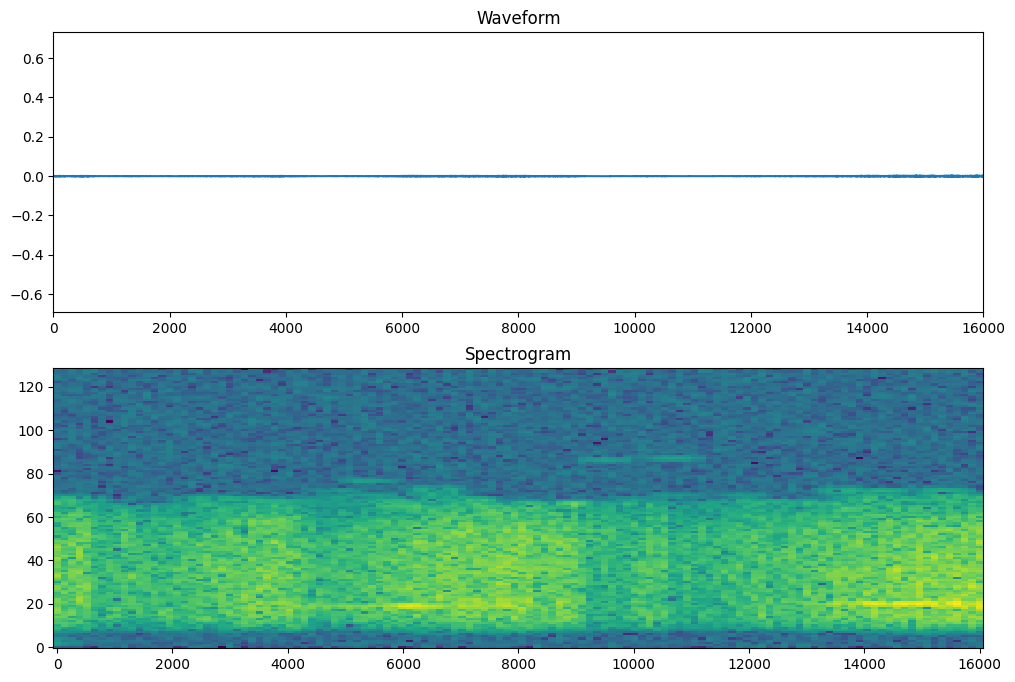

In [90]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title("Waveform")
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title("Spectrogram")
plt.show()

In [91]:
def get_spectrogram_and_label_id(audio, label):
    spectrogram = get_spectrogram(audio)
    label_id = tf.argmax(label == foldersInTrain)
    return spectrogram, label_id

In [92]:
spectrogram_ds = waveform_ds.map(
    map_func=get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE
)

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Can not squeeze dim[1], expected a dimension of 1, got 2
	 [[{{node Squeeze}}]] [Op:IteratorGetNext] name: 

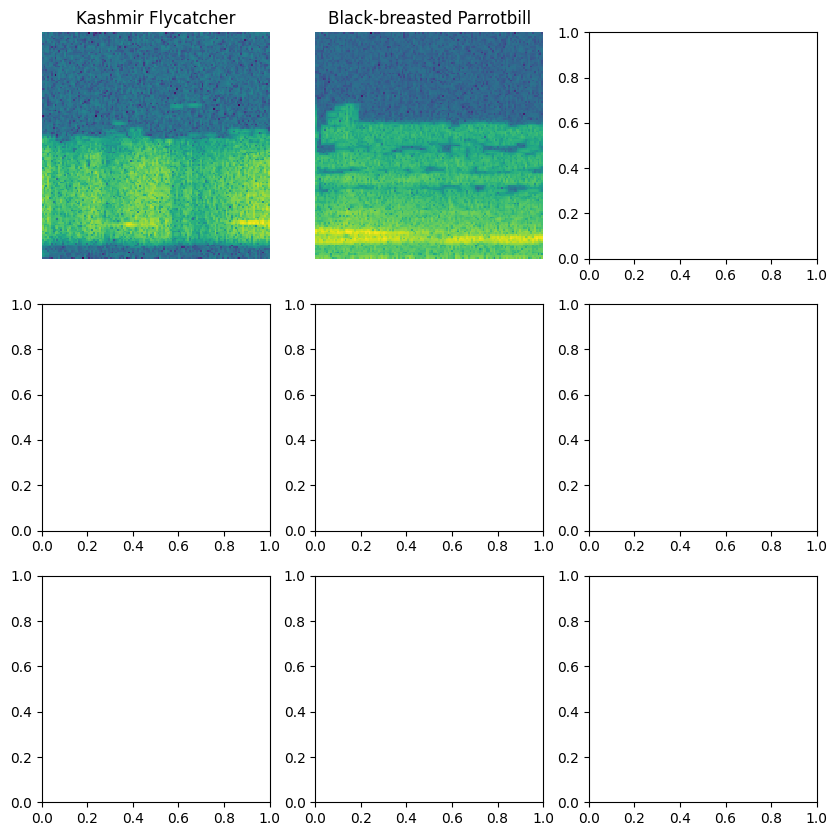

In [95]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(spectrogram.numpy(), ax)
    ax.set_title(foldersInTrain[label_id.numpy()])
    ax.axis("off")

plt.show()

In [ ]:
def preprocess_dataset(files):
    files_ds = tf.data.Dataset.from_tensor_slices(files)
    output_ds = files_ds.map(
        map_func=get_waveform_and_label, num_parallel_calls=AUTOTUNE
    )
    output_ds = output_ds.map(
        map_func=get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE
    )

    return output_ds

In [ ]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(val_files)
test_ds = preprocess_dataset(test_files)

In [ ]:
batch_size = 64
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)